In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from iotools import read_AsciiGrid

file = r'/scratch/project_2000908/nousu/SpaFHy_RESULTS/testcase_input_202402151348.nc'
cfile = r'/projappl/project_2000908/nousu/SpaFHy_v2.0/testcase_input/hyytiala2/catchment_mask.asc'
lfile = r'/projappl/project_2000908/nousu/SpaFHy_v2.0/testcase_input/hyytiala2/lake_mask.asc'

In [3]:
res = xr.open_dataset(file)

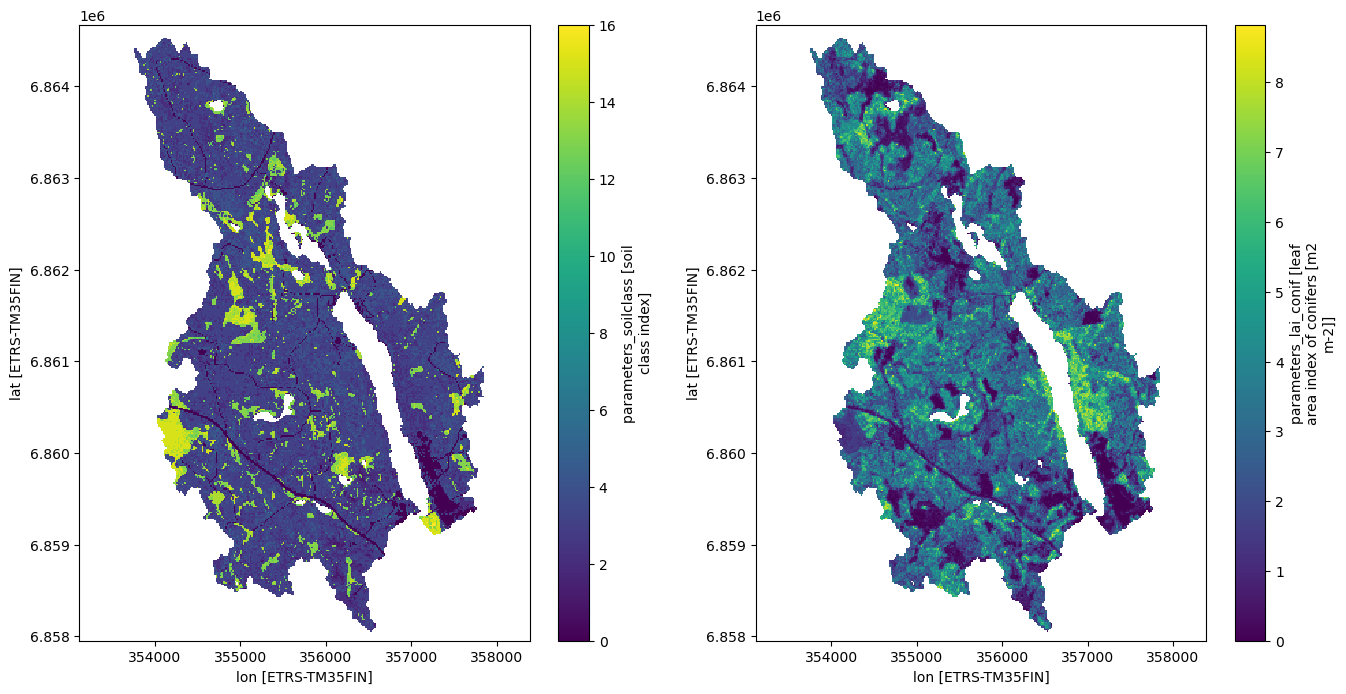

In [14]:
date = '2021-05-01'
plt.figure(figsize=(16,8))
ax=plt.subplot(1,2,1)
res['parameters_soilclass'][20:-60,70:-100].plot()
plt.subplot(1,2,2, sharex=ax, sharey=ax)
#res['bucket_moisture_root'].sel(time=date)[20:-60,70:-100].plot(cmap='coolwarm_r')
(res['parameters_lai_conif'])[20:-60,70:-100].plot()
#plt.subplot(2,2,4, sharex=ax, sharey=ax)
#res['bucket_moisture_top'].sel(time=date)[20:-60,70:-100].plot(cmap='coolwarm_r')
plt.savefig(f'characteristic_map.png',bbox_inches='tight', dpi=300)

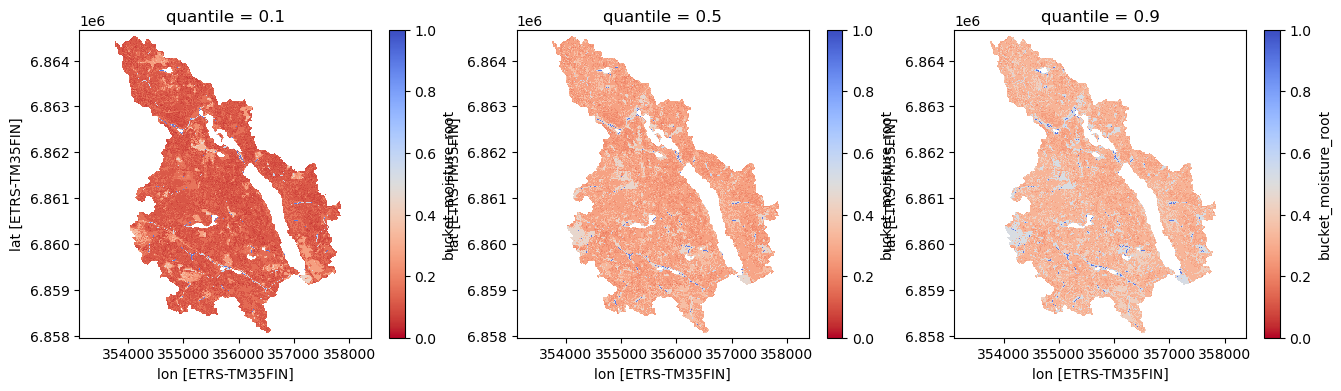

In [19]:
date = '2021-05-01'
plt.figure(figsize=(16,4))
ax=plt.subplot(1,3,1)
res['bucket_moisture_root'].quantile(0.1, dim=['time'])[20:-60,70:-100].plot(vmin=0, vmax=1, cmap='coolwarm_r')
plt.subplot(1,3,2, sharex=ax, sharey=ax)
#res['bucket_moisture_root'].sel(time=date)[20:-60,70:-100].plot(cmap='coolwarm_r')
res['bucket_moisture_root'].quantile(0.5, dim=['time'])[20:-60,70:-100].plot(vmin=0, vmax=1, cmap='coolwarm_r')
plt.subplot(1,3,3, sharex=ax, sharey=ax)
res['bucket_moisture_root'].quantile(0.9, dim=['time'])[20:-60,70:-100].plot(vmin=0, vmax=1, cmap='coolwarm_r')
plt.savefig(f'soilmoist_map.png',bbox_inches='tight', dpi=300)

In [90]:
cmask = read_AsciiGrid(cfile)[0].flatten()
cmask[np.where(cmask == 0)] = np.nan
lakes = read_AsciiGrid(lfile)[0].flatten()
sitetype = np.array(res['parameters_soilclass']).flatten()
ditches = np.array(res['parameters_ditches']).flatten()
sitetype[np.where(ditches < 0)] = 0
soilmoist = np.array(res['bucket_moisture_root'].mean(dim=['time'])).flatten()
drymoist = np.array(res['bucket_moisture_root'].quantile(q=0.1, dim=['time'])).flatten()
wetmoist = np.array(res['bucket_moisture_root'].quantile(q=0.9, dim=['time'])).flatten()
cmask[np.where(ditches < 0)] = 0
cmask = cmask[~np.isnan(soilmoist)]
soilmoist = soilmoist[~np.isnan(soilmoist)]

/PUHTI_TYKKY_dZLBpmf/miniconda/envs/env1/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


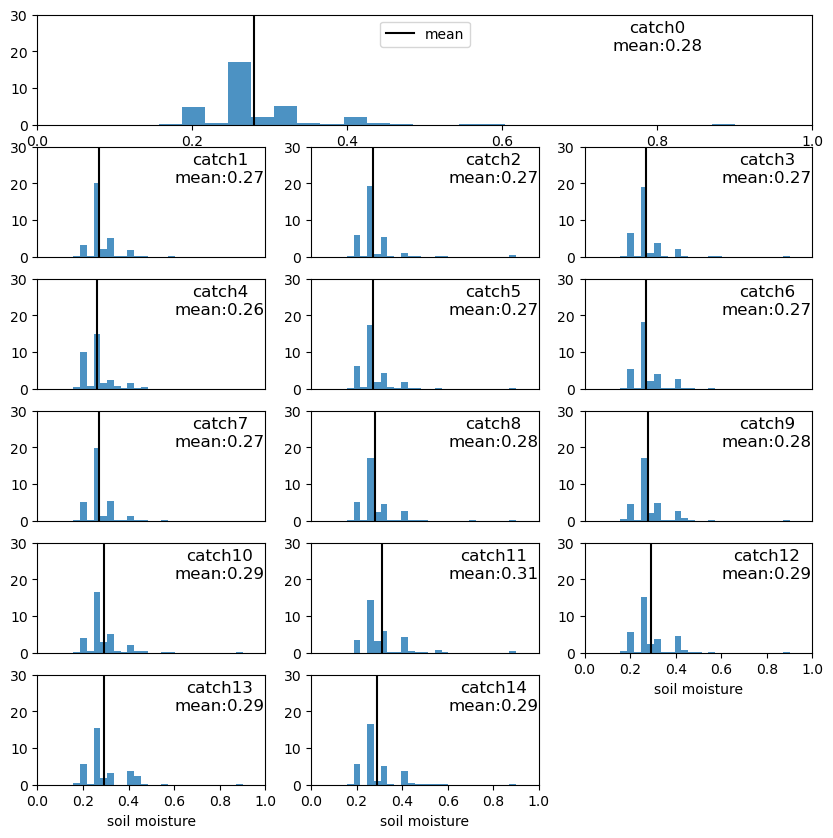

In [94]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(6, 3)
ax1 = fig.add_subplot(gs[0, 0:])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[2, 2])
ax8 = fig.add_subplot(gs[3, 0])
ax9 = fig.add_subplot(gs[3, 1])
ax10 = fig.add_subplot(gs[3, 2])
ax11 = fig.add_subplot(gs[4, 0])
ax12 = fig.add_subplot(gs[4, 1])
ax13 = fig.add_subplot(gs[4, 2])
ax14 = fig.add_subplot(gs[5, 0])
ax15 = fig.add_subplot(gs[5, 1])

data = soilmoist.copy()
data[data == -9999] = np.nan
cmask[cmask == -9999] = np.nan

data = data[np.isfinite(data)]
cmask = cmask[np.isfinite(cmask)]

cs = np.unique(cmask)
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15]

bins=np.histogram(np.hstack((data)), bins=25)[1] #get the bin edges

for i in range(len(axes)):
    catch = int(cs[i])
    
    if i == 0:
        plot_data = data
    else:
        plot_data = data[np.where(cmask == catch)]
    axes[i].hist(plot_data, alpha=0.8, bins=bins, density=True)
    
    mean_num = round(np.nanmean(plot_data),2)
    mean_str = str(round(np.nanmean(plot_data),2))

    axes[i].axvline(x=mean_num, color='black', label='mean')

    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0,30])

    if i not in [0,12,13,14]:
        axes[i].set_xticks([])
    else:
        axes[i].set_xlabel('soil moisture')

    axes[i].text(0.8, 0.8,f'catch{catch}\nmean:{mean_str}', size=12,
     horizontalalignment='center',
     verticalalignment='center',
     transform = axes[i].transAxes)
    
    if i == 0:
        axes[i].legend(loc='upper center')
        
plt.savefig(f'soilmoist_mean.png',bbox_inches='tight', dpi=300)

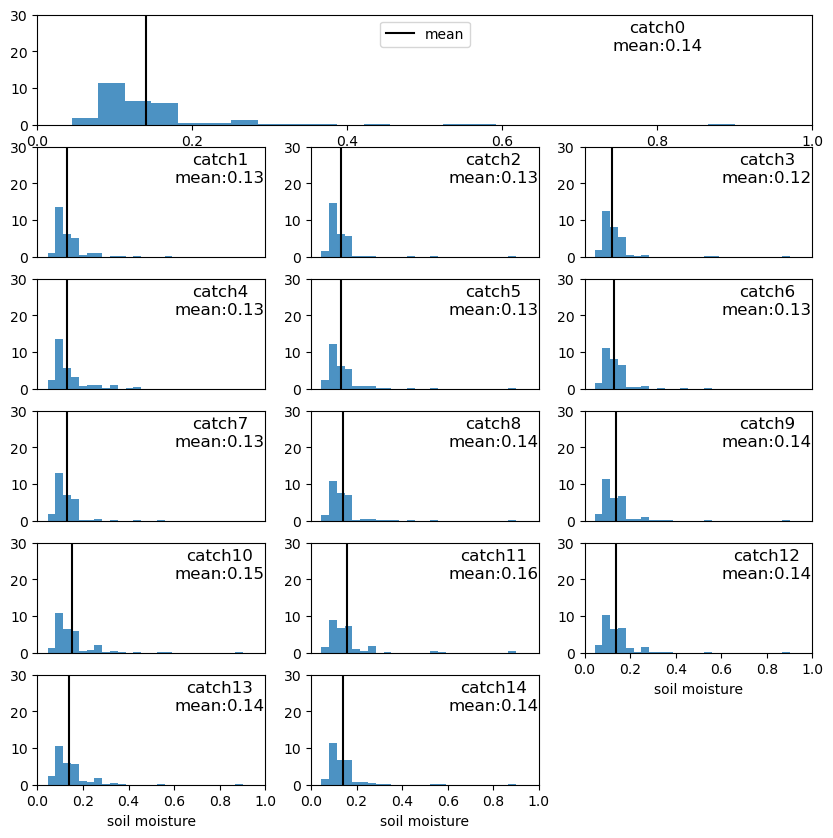

In [95]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(6, 3)
ax1 = fig.add_subplot(gs[0, 0:])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[2, 2])
ax8 = fig.add_subplot(gs[3, 0])
ax9 = fig.add_subplot(gs[3, 1])
ax10 = fig.add_subplot(gs[3, 2])
ax11 = fig.add_subplot(gs[4, 0])
ax12 = fig.add_subplot(gs[4, 1])
ax13 = fig.add_subplot(gs[4, 2])
ax14 = fig.add_subplot(gs[5, 0])
ax15 = fig.add_subplot(gs[5, 1])

data = drymoist.copy()
data[data == -9999] = np.nan
cmask[cmask == -9999] = np.nan

data = data[np.isfinite(data)]
cmask = cmask[np.isfinite(cmask)]

cs = np.unique(cmask)
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15]

bins=np.histogram(np.hstack((data)), bins=25)[1] #get the bin edges

for i in range(len(axes)):
    catch = int(cs[i])
    
    if i == 0:
        plot_data = data
    else:
        plot_data = data[np.where(cmask == catch)]
    axes[i].hist(plot_data, alpha=0.8, bins=bins, density=True)
    
    mean_num = round(np.nanmean(plot_data),2)
    mean_str = str(round(np.nanmean(plot_data),2))

    axes[i].axvline(x=mean_num, color='black', label='mean')

    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0,30])

    if i not in [0,12,13,14]:
        axes[i].set_xticks([])
    else:
        axes[i].set_xlabel('soil moisture')

    axes[i].text(0.8, 0.8,f'catch{catch}\nmean:{mean_str}', size=12,
     horizontalalignment='center',
     verticalalignment='center',
     transform = axes[i].transAxes)
    
    if i == 0:
        axes[i].legend(loc='upper center')
        
plt.savefig(f'drymoist.png',bbox_inches='tight', dpi=300)

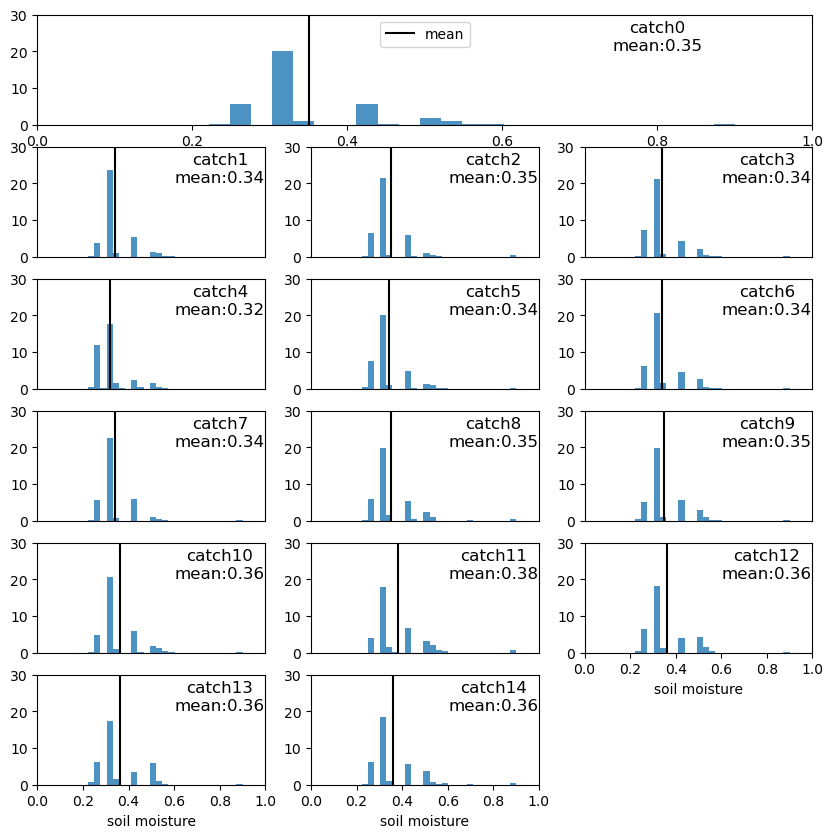

In [96]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(6, 3)
ax1 = fig.add_subplot(gs[0, 0:])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[2, 2])
ax8 = fig.add_subplot(gs[3, 0])
ax9 = fig.add_subplot(gs[3, 1])
ax10 = fig.add_subplot(gs[3, 2])
ax11 = fig.add_subplot(gs[4, 0])
ax12 = fig.add_subplot(gs[4, 1])
ax13 = fig.add_subplot(gs[4, 2])
ax14 = fig.add_subplot(gs[5, 0])
ax15 = fig.add_subplot(gs[5, 1])

data = wetmoist.copy()
data[data == -9999] = np.nan
cmask[cmask == -9999] = np.nan

data = data[np.isfinite(data)]
cmask = cmask[np.isfinite(cmask)]

cs = np.unique(cmask)
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15]

bins=np.histogram(np.hstack((data)), bins=25)[1] #get the bin edges

for i in range(len(axes)):
    catch = int(cs[i])
    
    if i == 0:
        plot_data = data
    else:
        plot_data = data[np.where(cmask == catch)]
    axes[i].hist(plot_data, alpha=0.8, bins=bins, density=True)
    
    mean_num = round(np.nanmean(plot_data),2)
    mean_str = str(round(np.nanmean(plot_data),2))

    axes[i].axvline(x=mean_num, color='black', label='mean')

    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0,30])

    if i not in [0,12,13,14]:
        axes[i].set_xticks([])
    else:
        axes[i].set_xlabel('soil moisture')

    axes[i].text(0.8, 0.8,f'catch{catch}\nmean:{mean_str}', size=12,
     horizontalalignment='center',
     verticalalignment='center',
     transform = axes[i].transAxes)
    
    if i == 0:
        axes[i].legend(loc='upper center')
        
plt.savefig(f'wetmoist.png',bbox_inches='tight', dpi=300)